Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

# Import the titanic dataset here

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [7]:
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic.loc[
    (df_titanic["class"] == "1st") |
    (df_titanic["class"] == "2nd") |
    (df_titanic["class"] == "3rd")
]


,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [22]:
joint_dist = pd.crosstab(df_passengers["class"], df_passengers["embarked"])

print(joint_dist)



embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


2. Using the joint distribution that calculated above, calculate the following:

● the conditional distribution of their class given where they embarked

In [50]:
class_given_embarked = pd.crosstab(df_passengers["class"], df_passengers["embarked"],normalize="columns")
print(class_given_embarked)


embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


● the conditional distribution of where they embarked given their class

In [51]:
pd.crosstab(df_passengers["embarked"], df_passengers["class"],normalize="columns")

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


Use the conditional distributions that you calculate to answer the following quesitons:

● What proportion of 3rd class passengers embarked at Southampton?

In [30]:
Third_Southampton = 494 / (102 + 113 + 494)

print(Third_Southampton)


0.6967559943582511


● What proportion of Southampton passengers were in 3rd class?

In [31]:
Southampton_third = 494 / (175 + 245 + 494)

print(Southampton_third)



0.5404814004376368


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

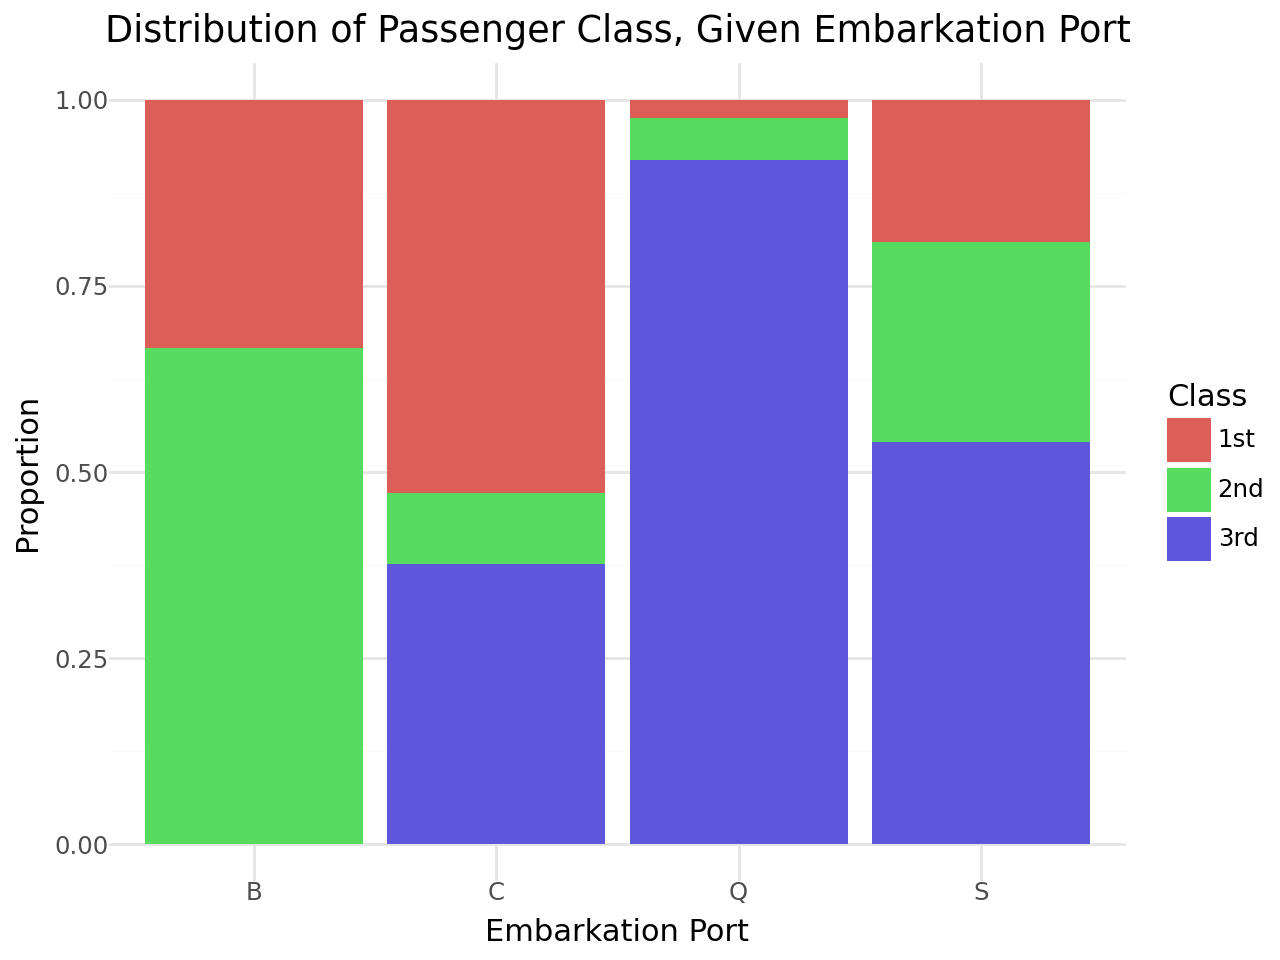

In [52]:
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal

class_given_embarked = pd.crosstab(df_passengers["class"], df_passengers["embarked"],normalize="columns")

class_given_embarked = class_given_embarked.reset_index().melt(
    id_vars="class",
    var_name="embarked",
    value_name="proportion"
)


(
    ggplot(class_given_embarked, aes(x="embarked", y= "proportion" , fill="class"))
    + geom_bar(stat="identity", position="stack")
    + labs(
        title="Distribution of Passenger Class, Given Embarkation Port",
        x="Embarkation Port",
        y="Proportion",
        fill="Class"
    )
    + theme_minimal()
)